# 1a. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1b. Import data

In [2]:
# Create path
path = r'C:\Users\opetr\Documents\Instacart Basket Analysis'

In [3]:
# Import the most recent dataset
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\opetr\\Documents\\Instacart Basket Analysis\\02 Data\\Prepared Data\\instacart_final.pkl'

# 2. Create a bar chart, a histogram, a scatterplot, and a line chart

### Create a bar chart

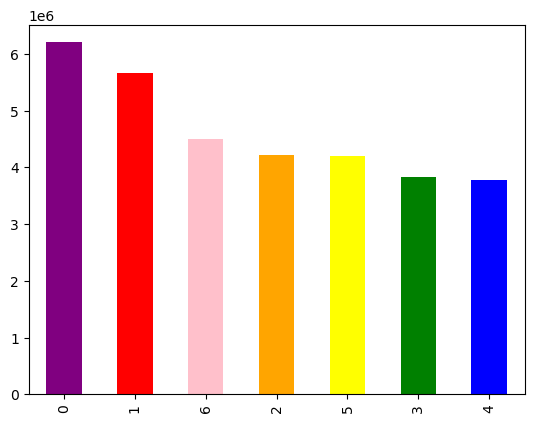

In [4]:
bar = df_final['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [5]:
# Check descriptive statistics for the column
df_final['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [6]:
# Check the max
df_final['prices'].max()

99999.0

In [7]:
# Check for outliers
df_final.loc[df_final['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,nr_of_dependents,marital_status,income
7805,24261,1435153,1519,26,2,11,6.0,21553,15,0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,24267,1066435,1519,32,3,10,5.0,21553,28,1,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,39073,1697208,2409,33,1,19,5.0,21553,1,0,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,57126,965345,3531,27,2,19,8.0,33664,2,0,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,61481,2943740,3793,1,2,9,NaN,21553,3,0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,854612,3265389,51346,4,1,17,13.0,33664,2,1,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,2186800,1179092,131671,12,4,9,15.0,33664,1,0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,658416,1226705,39667,7,2,15,20.0,33664,14,0,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,1583942,3000037,95105,2,4,19,22.0,33664,4,0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [8]:
# Turn values into NaNs
df_final.loc[df_final['prices'] > 100, 'prices'] = np.nan

In [9]:
# Re-check max
df_final['prices'].max()

25.0

### Create a histogram

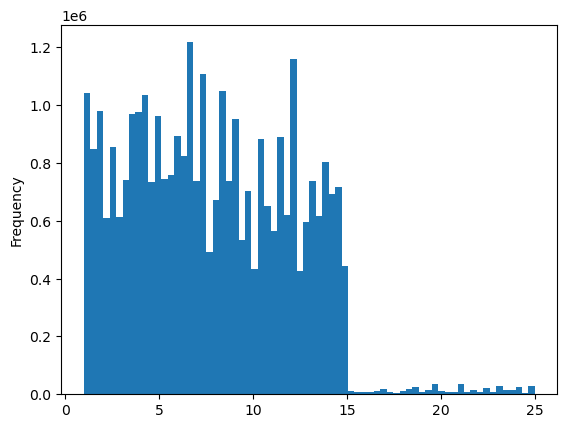

In [10]:
hist = df_final['prices'].plot.hist(bins = 70)

### Create a scatterplot

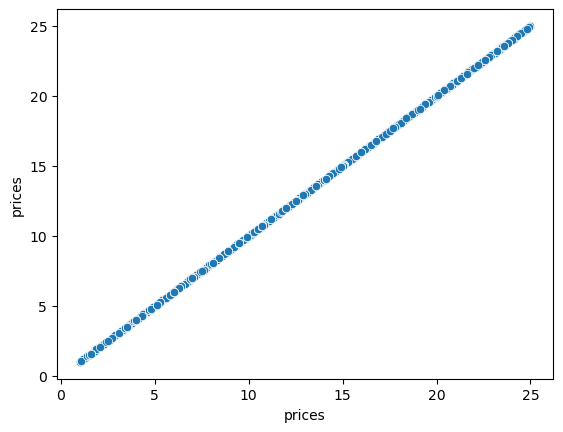

In [11]:
splot = sns.scatterplot(x = 'prices', y = 'prices',data = df_final)

In [12]:
# Set the seed
np.random.seed(4)

In [13]:
# Create a list holding True/False values
dev = np.random.rand(len(df_final)) <= 0.7

In [14]:
# Check random output
np.random.rand()

0.9354668599465477

In [15]:
# Store 70% of the sample in the dataframe big
big = df_final[dev]

In [16]:
# Store 30% of the sample in the dataframe small
small = df_final[~dev]

In [17]:
# Total row count
len(df_final)

32404859

In [18]:
# Add up big and small dataframes
len(big) + len(small)

32404859

In [19]:
# Create dataframe for relevant columns
df_2 = small[['orders_day_of_week','prices']]

### Create a line chart

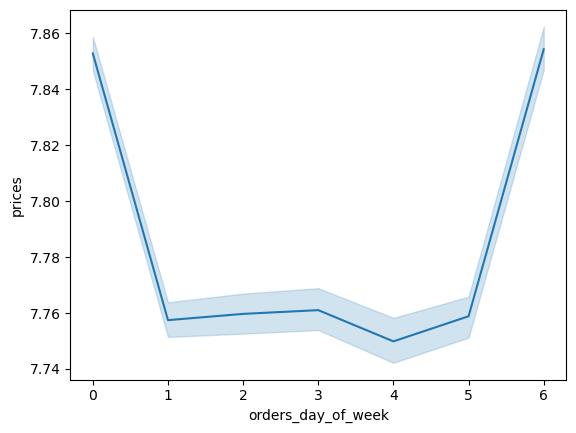

In [20]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# 3. Create a histogram of the order_hour_of_day column

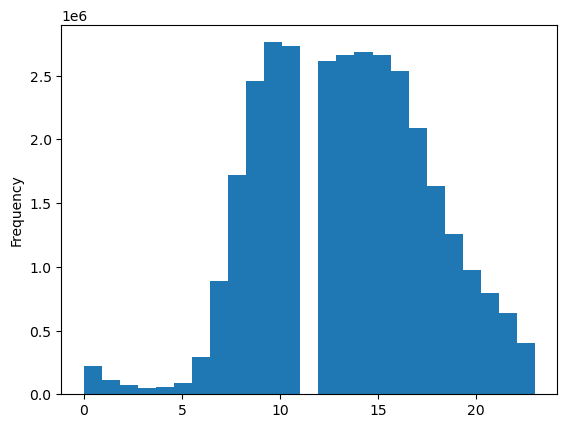

In [21]:
# Create a histogram
hist2 = df_final['order_hour_of_day'].plot.hist(bins = 25)

#### The histogram shows the number of sales by hour of the day. It appears the most transactions happen between 10 AM and 3 PM.

# 4. Create a bar chart from the loyalty_flag column

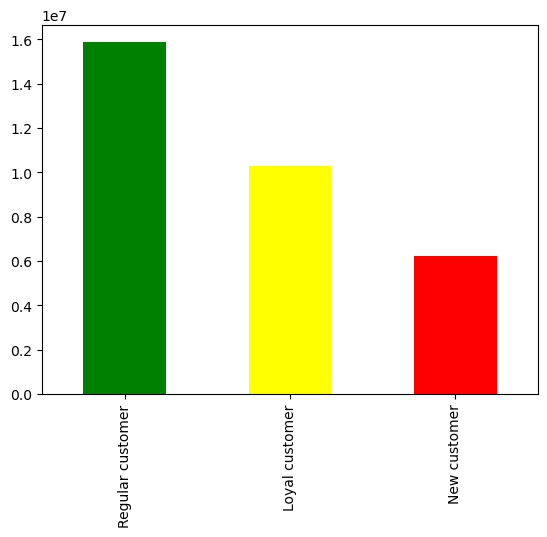

In [22]:
# Create a bar chart
bar2 = df_final['loyalty_flag'].value_counts().plot.bar(color =['green', 'yellow', 'red'])

# 5. Check the difference in expenditure depending on the hour of the day

In [23]:
# Use the small dataframe created earlier, which is a sample size of 30%. Create new dataframe for relevant columns
df_expenditure = small[['order_hour_of_day', 'prices']]

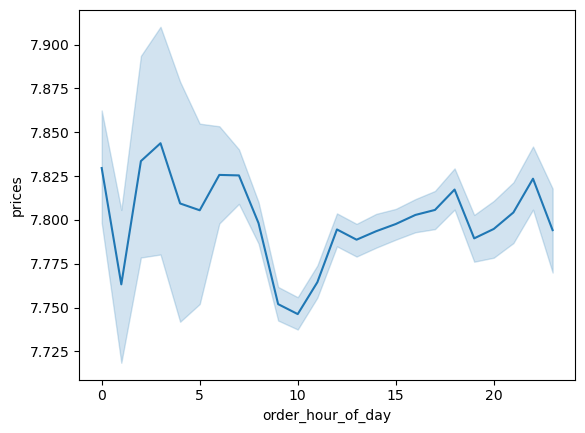

In [24]:
# Create a line chart
line2 = sns.lineplot(data = df_expenditure, x = 'order_hour_of_day', y = 'prices')

# 6. Create a line chart to explore the connection between age and number of dependents

In [25]:
# Use the small dataframe created earlier, which is a sample size of 30%. Create new dataframe for relevant columns
df_demo = small[['age', 'nr_of_dependents']]

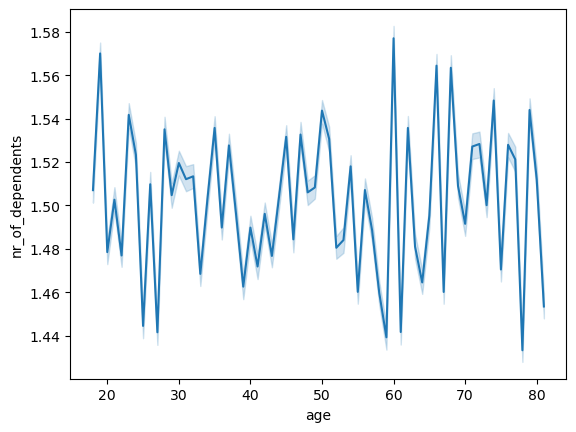

In [26]:
# Create a line chart
line3 = sns.lineplot(data = df_demo, x = 'age', y = 'nr_of_dependents')

#### The line chart shows the connection between customer age and the number of dependents. This visualization shows no clear connection between the two variables.

# 7. Create a scatterplot to explore the connection between age and spending power

In [27]:
# Use the small dataframe created earlier, which is a sample size of 30%. Create new dataframe for relevant columns
df_age_income = small[['age', 'income']]

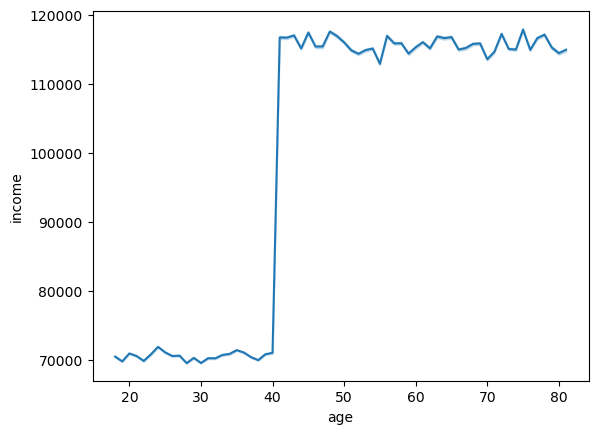

In [29]:
# Create a line chart
splot2 = sns.lineplot(data = df_age_income, x = 'age', y = 'income')

#### The scatterplot shows the connection between customer age and customer income. The majority of customers across all ages have an income of up to 200,000. The customers with the most spending power are from ages 40 and up.

# 8. Export your visualizations as .png files

In [30]:
# Export bar chart for orders_day_of_week
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_01.png'))

In [31]:
# Export histogram for prices
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_01.png'))

In [32]:
# Export scatterplot for prices
splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_01.png'))

In [33]:
# Export line chart for x = orders_day_of_week and y = prices
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_01.png'))

In [34]:
# Export histogram for order_hour_of_day
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_02.png'))

In [35]:
# Export bar chart for loyalty_flag
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_02.png'))

In [36]:
# Export line chart for expenditure
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_02.png'))

In [37]:
# Export line chart for customer demographics
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_03.png'))

In [38]:
# Export scatterplot for spending power
splot2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_02.png'))